In [240]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np

In [241]:
# definere preprocessoren
features = ["model", "year", "transmission", "mileage", "fuelType", "mpg", "engineSize", "brand"]
with(open("features.pkl", "wb")) as f:
    pkl.dump(features, f)

cat_features = ["model", "transmission", "fuelType", "brand"]
cont_features = ["year", "mileage", "mpg", "engineSize"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), cat_features),
        ("cont", StandardScaler(), cont_features)
    ])

In [242]:
# indlæser datasættet og transormere med prepocessor
data = pd.read_csv("./samletdata.csv", sep=";", decimal=",")
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data["model"] = data["model"].str.strip()

# Split data into features (X) and target variable (y)
X = preprocessor.fit_transform(data.drop(["price", "tax"], axis=1))
with(open("preprocessor.pkl", "wb")) as f:
    pkl.dump(preprocessor, f)

y = data['price']

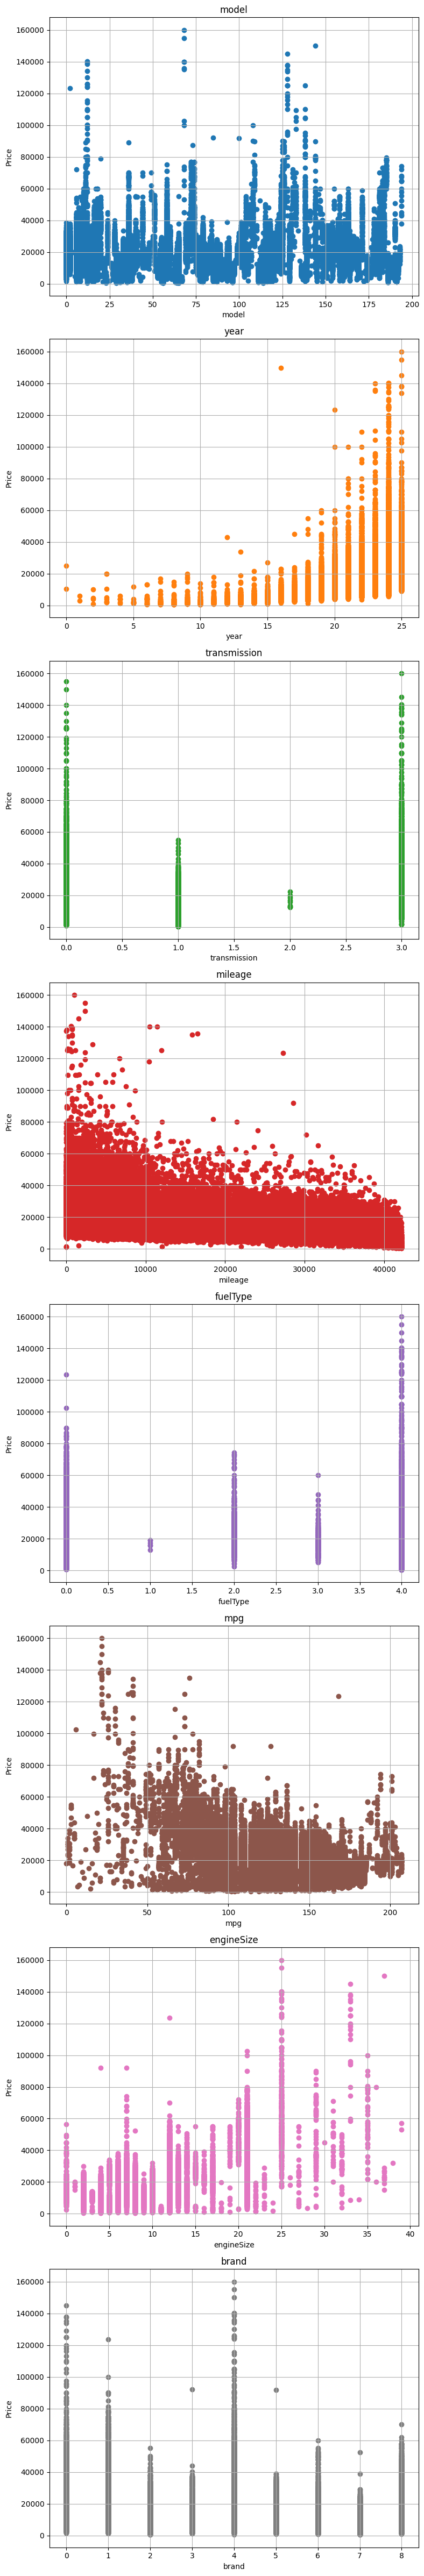

In [233]:
# scatterplots

colors = {"model": "tab:blue", "year": "tab:orange", "transmission": "tab:green", "mileage": "tab:red", "fuelType": "tab:purple", "mpg": "tab:brown", "engineSize": "tab:pink", "brand": "tab:gray"}

le = LabelEncoder()
X_plot = pd.DataFrame({name: le.fit_transform(data) for name, data in data.drop(["price", "tax"], axis=1).items()})

# Create individual subplots for each feature
fig, axs = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 6 * len(features)))

# Iterate over each feature and create scatterplot
for i, col in enumerate(features):
    axs[i].scatter(X_plot.iloc[:, i], y, c=colors[col])
    axs[i].set_title(col)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Price')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [243]:
# lav "pipeline" og fitter den til dataen
model = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=3)),
    ('regressor', LinearRegression())
], verbose=True)

model.fit(X, y)


[Pipeline] .............. (step 1 of 2) Processing poly, total=   0.3s
[Pipeline] ......... (step 2 of 2) Processing regressor, total= 1.8min


Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('regressor', LinearRegression())],
         verbose=True)

In [244]:
# test prediction
test_data = {col: [data] for col, data in zip(features, ["Octavia", 2010, "Manual", 118000, "Petrol", 41.2, 1.2, "skoda"])}

test_data = pd.DataFrame(test_data)
test_data = preprocessor.transform(test_data)
print(model.predict(test_data))

[4856.47692679]


In [ ]:
# test R2 værdi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)
model.fit(X_train, y_train)
# Score the model
score = model.score(X_test, y_test)

print("Model R-squared (R2) Score:", score)